## Libraries

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Data

In [2]:
#kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None )
with open('../../Data/kddcup.names.txt') as f:
    reader = csv.reader(f,delimiter = ':')
    class_label = next(reader,None)
    headerRow = [column[0] for column in reader]
    headerRow = headerRow+['classLabel']
    kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None)
    kdd.columns=headerRow

## Total Rows and Columns

In [3]:
kdd.shape

(494021, 42)

## Data Manipulation and Data processing

In [4]:
## Dictionary of General category and Attacks
## Portsweeping = 10413  --> 1114  (Probing)
## back         = 2203   --> 1114  (DOS)
## smurf        = Large   --> 1114  (DOS) 
## neptune      = 'Large'  --> 1114  (DOS)
## satan        =  15892 --> 1114 (Probing)
## ipsweep      = 12481 -- 1114 (Probing)
## land         =  21 -->       (DOS)
## nmap         =  2316 --> 1114   (Probing)
## multihop     =  4    (R2L)
## TearDrop     = 979   (Probing)
## Pod          = 264   (DOS)
## guess_passwd = 53    (R2L)
## buffer_overflow = 30 (U2R) 
## warezmaster = 20     (R2L)
## imap        = 12     (Probing)
## rootkit     = 10 (Probing)
## loadmodule  = 9  (U2R)
## ftp_write   = 8  (R2L)
## multihop    = 7  (R2L)
## phf         = 4  (R2L)
## perl        = 3  (U2R) 
## spy         = 2 (R2L)
categories = {
                'normal.':'Normal',
                'buffer_overflow.':'U2R',
                'loadmodule.':'U2R',
                'perl.':'U2R',
                'neptune.':'DOS',
                'smurf.':'DOS',
                'guess_passwd.':'R2L',
                'pod.':'DOS',
                'teardrop.':'DOS',
                'portsweep.':'Probing',
                'ipsweep.':'Probing',
                'land.':'DOS',
                'ftp_write.':'R2L',
                'back.':'DOS',
                'imap.':'Probing',
                'satan.':'Probing',
                'phf.':'R2L',
                'nmap.':'Probing',
                'multihop.':'R2L',
                'warezmaster.':'R2L',
                'warezclient.':'R2L',
                'rootkit.':'U2R',
                'spy.':'R2L'
            }

kdd['category'] = kdd['classLabel'].map(categories)
 
## Group by General Category and detailed class Label
groupClassLabel = kdd.groupby('classLabel').count()['duration'].sort_values(ascending = False)
groupCategory = kdd.groupby('category').count()['duration'].sort_values(ascending = False)


In [34]:
for i in kdd:
    print(i)

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
classLabel
category


## Total Records by Attack Class

In [8]:
groupClassLabel

classLabel
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: duration, dtype: int64

## Distribution of Attack Class

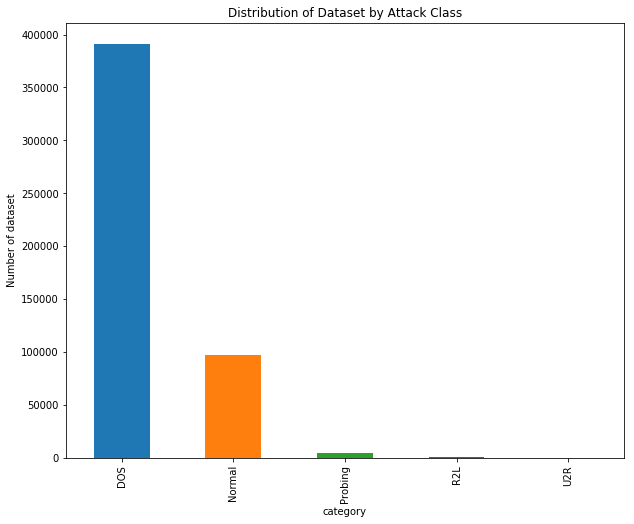

In [15]:
plt.figure()
groupCategory.plot(kind='bar', figsize= (10,8))
plt.title("Distribution of Dataset by Attack Class")
plt.ylabel('Number of dataset')
plt.show()

## Distribution of Attack Class in numbers

In [10]:
glc = ['DOS','Normal','Probing','R2L','U2R']
for j, i in zip(glc,groupCategory):
    print(j,": ",i,"(", round((i/kdd.shape[0])*100),"%)")

DOS :  391458 ( 79 %)
Normal :  97278 ( 20 %)
Probing :  4119 ( 1 %)
R2L :  1114 ( 0 %)
U2R :  52 ( 0 %)


## Balancing the dataset

In [11]:
kdd_R2L = kdd.loc[kdd['category'] == 'R2L']
kdd_Probing = kdd.loc[kdd['category'] == 'Probing'][:1114]
kdd_Normal = kdd.loc[kdd['category'] == 'Normal'][:1114]
kdd_DOS = kdd.loc[kdd['category'] == 'DOS'][:1114]


In [12]:
## concatinating all datasets together
dataframes = [kdd_R2L,kdd_Probing,kdd_Normal,kdd_DOS]
kdd_prop = pd.concat(dataframes)
kdd_prop.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classLabel,category
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.,R2L
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.,R2L
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.,R2L
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.,R2L
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.,R2L


## Features in dataset

In [87]:
kdd_prop.columns 
## Event,event type, packet size,  

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'classLabel', 'category'],
      dtype='object')

## Distribution of Balanced Dataset

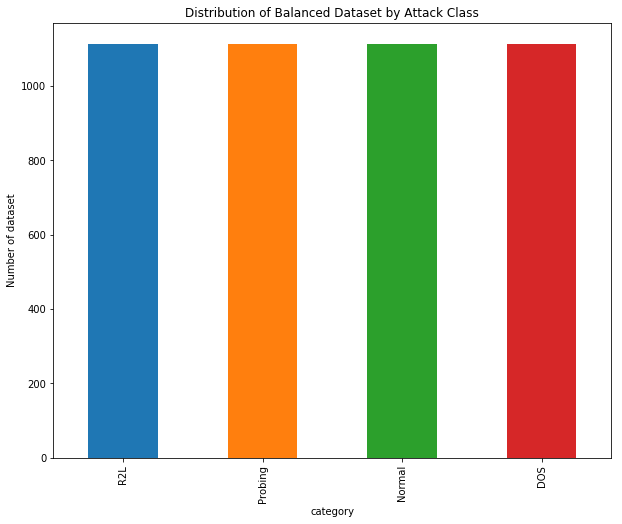

In [14]:
groupCategory_prop = kdd_prop.groupby('category').count()['duration'].sort_values(ascending = False)
plt.figure()
groupCategory_prop.plot(kind='bar', figsize= (10,8))
plt.title("Distribution of Balanced Dataset by Attack Class")
plt.ylabel('Number of dataset')
plt.show()

## Initial 5 Rows of the dataset

In [17]:
kdd_prop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classLabel,category
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.,R2L
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.,R2L
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.,R2L
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.,R2L
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.,R2L


## Converting Categorical Values into Numerical values

In [16]:
#1. Unique Values
print("Unique values of service: ",kdd_prop.service.unique(),"\n")
print("Unique values of flag: ",kdd_prop.flag.unique(),"\n")
print("Unique values of land: ",kdd_prop.land.unique(),"\n")
print("Unique values of logged_in: ",kdd_prop.logged_in.unique(),"\n")
print("Unique values of is_host_login: ",kdd_prop.is_host_login.unique(),"\n")
print("Unique values of is_guest_login: ",kdd_prop.is_guest_login.unique(),"\n")
print("Unique values of protocol type: ",kdd_prop.protocol_type.unique(),"\n")

Unique values of service:  ['telnet' 'ftp' 'login' 'ftp_data' 'http' 'other' 'private' 'rje' 'smtp'
 'time' 'mtp' 'link' 'remote_job' 'gopher' 'ssh' 'name' 'finger' 'whois'
 'domain' 'imap4' 'domain_u' 'daytime' 'eco_i' 'ctf' 'pop_3' 'nntp'
 'ecr_i' 'systat' 'hostnames' 'sunrpc' 'netstat' 'supdup' 'csnet_ns'
 'vmnet' 'auth' 'ntp_u'] 

Unique values of flag:  ['SF' 'S3' 'RSTO' 'RSTR' 'S2' 'REJ' 'RSTOS0' 'S0' 'SH' 'S1' 'OTH'] 

Unique values of land:  [0] 

Unique values of logged_in:  [0 1] 

Unique values of is_host_login:  [0] 

Unique values of is_guest_login:  [0 1] 

Unique values of protocol type:  ['tcp' 'udp' 'icmp'] 



In [11]:
## Exploration of attributes and find connection between different variables

##Our results indicate that normal, neptune and smurf classes are highly related to certain features that make their classification easier. 
#Since these three classes make up 98% of the training data, it is very easy for a machine learning algorithm to achieve good results.

## Preprocessing

In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
## Encoding Service
le.fit(kdd_prop.service)
kdd_prop['service']= le.transform(kdd_prop.service)

## Encoding Flag
le.fit(kdd_prop.flag)
kdd_prop['flag'] = le.transform(kdd_prop.flag)

le.fit(kdd_prop.protocol_type)
kdd_prop['protocol_type'] = le.transform(kdd_prop.protocol_type)



##  Training - Testing Split and Feature Selection

In [19]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

#X = np.array(kdd_prop.drop(['category','classLabel'], axis = 1))
#y = np.array(kdd_prop['category'])

X = kdd_prop.drop(['category','classLabel'], axis = 1)
y = kdd_prop['category']

# Train - Test split (70% and 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Machine Learning Model
clf = ExtraTreesClassifier()

# Fitting X
clf = clf.fit(X, y)

# Feature Importance
print ("Features sorted by their score: \n")
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), headerRow), 
             reverse=True))

Features sorted by their score: 

[(0.1621, 'count'), (0.0998, 'service'), (0.0991, 'logged_in'), (0.0966, 'dst_host_same_src_port_rate'), (0.0719, 'srv_count'), (0.0704, 'dst_host_same_srv_rate'), (0.0639, 'srv_diff_host_rate'), (0.0639, 'dst_host_srv_count'), (0.0553, 'dst_host_count'), (0.0501, 'protocol_type'), (0.0234, 'dst_host_diff_srv_rate'), (0.0232, 'dst_host_srv_diff_host_rate'), (0.019, 'hot'), (0.0151, 'dst_host_srv_rerror_rate'), (0.0132, 'rerror_rate'), (0.0098, 'srv_serror_rate'), (0.0092, 'src_bytes'), (0.0083, 'dst_host_rerror_rate'), (0.0075, 'flag'), (0.0065, 'srv_rerror_rate'), (0.0061, 'dst_host_srv_serror_rate'), (0.0057, 'serror_rate'), (0.0045, 'dst_bytes'), (0.0036, 'is_guest_login'), (0.0032, 'dst_host_serror_rate'), (0.0025, 'diff_srv_rate'), (0.0021, 'duration'), (0.0014, 'num_failed_logins'), (0.0008, 'root_shell'), (0.0005, 'num_root'), (0.0005, 'num_access_files'), (0.0004, 'same_srv_rate'), (0.0003, 'num_compromised'), (0.0001, 'urgent'), (0.0, 'wrong_f

## Selecting top ranked features

In [20]:
## Selecting top ranked features

X_fe = X[['logged_in',
           'dst_host_srv_count',
           'srv_count',
           'dst_host_same_src_port_rate',
           'protocol_type',
           'srv_diff_host_rate',
           'dst_host_count',
           'count',
           'is_guest_login',
           'src_bytes',
           'hot',
             ]]

y_fe = kdd_prop['category']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

## Correlation between features of the dataset

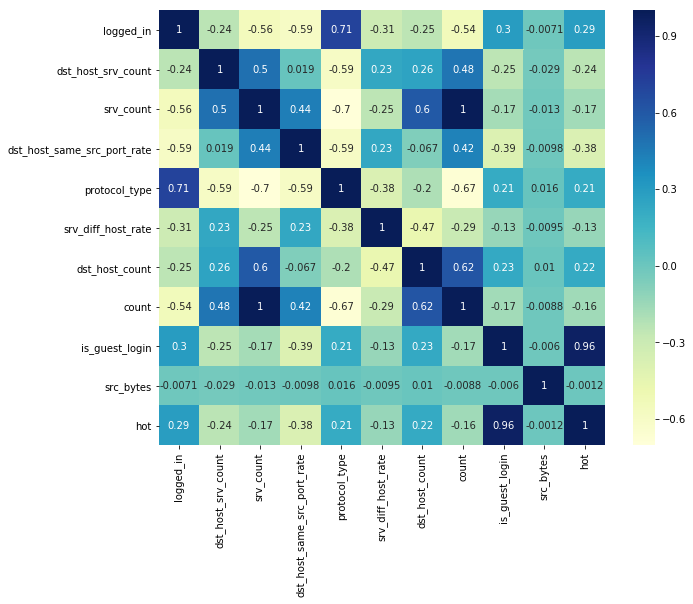

In [62]:
## Descriptive statistics
corr = X_fe.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu" )

## Machine Learning Models

## Random forest Algorithm

Accuracy is:  0.9955123410620793


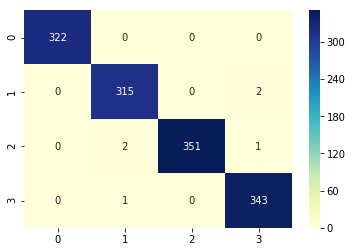

In [22]:
## Accuracy with all features 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#random forest classifier with n_estimators 
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu" )

Accuracy is:  0.9910246821241586


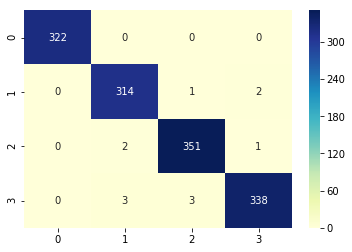

In [24]:
## Accuracy with features selected by ranking
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#random forest classifier with n_estimators 
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train_fe,y_train_fe)

ac = accuracy_score(y_test_fe,clf_rf.predict(X_test_fe))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_fe,clf_rf.predict(X_test_fe))

sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

## Decision Tree Algorithm

Accuracy is:  0.9917726252804787


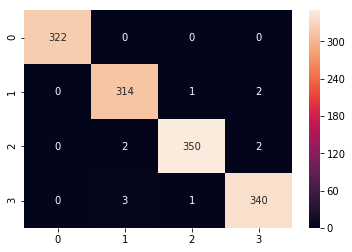

In [46]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
ac = accuracy_score(y_test,predictions)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")

## Gaussian NB

Accuracy is:  0.46297681376215405


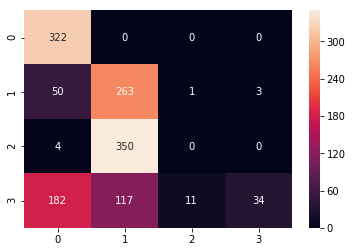

In [48]:
## Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_gnb = gnb.predict(X_test)
ac = accuracy_score(y_test,predictions_gnb)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_gnb)

sns.heatmap(cm,annot = True , fmt = "d")

## Support Vector Machine

Accuracy is:  0.8825729244577412


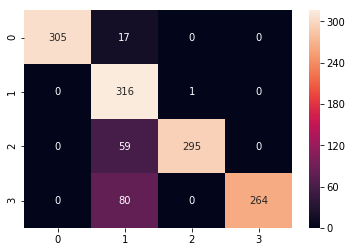

In [54]:
## Support Vector Machine
clf_svc = SVC()
    
clr_svc = clf_svc.fit(X_train,y_train)
prediction = clf_svc.predict(X_test)
ac = accuracy_score(y_test,prediction)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt="d")

## Linear Discriminant Analysis

Accuracy is:  0.9798055347793567


/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


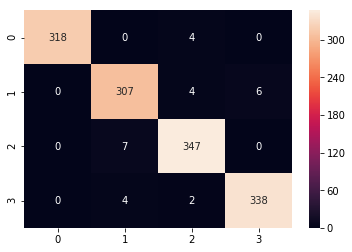

In [49]:
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train)
predictions_ld = ld.predict(X_test)
ac = accuracy_score(y_test,predictions_ld)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_ld)
sns.heatmap(cm,annot = True , fmt = "d")

## Data Analysis

In [40]:
## find relevant features to classify for each label and create a list
## we might be able create a list and find with help of domain knowledge how they are related to each other
## and how do they help us classify into these classes

from sklearn import tree
import graphviz 

clf = tree.DecisionTreeClassifier(class_weight=None, max_depth=3)
clf = clf.fit(X_fe,y_fe)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_fe.columns,
                                class_names = clf.classes_,
                                filled=True,
                                rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data) 



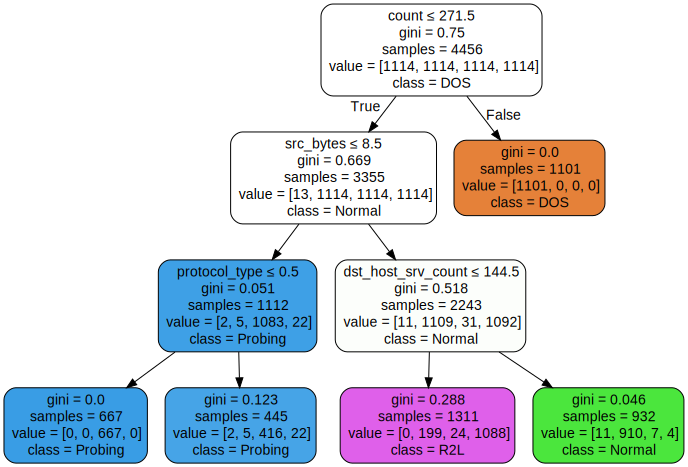

In [41]:
graph

Accuracy is:  94.83919222139117


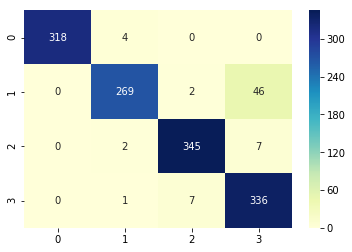

In [43]:
#['DOS','R2L','Normal','Probing']

ac = accuracy_score(y_test_fe,clf.predict(X_test_fe))
print('Accuracy is: ',(ac)*100)
cm = confusion_matrix(y_test_fe,clf.predict(X_test_fe))

sns.heatmap(cm, annot=True, fmt='d',  cmap="YlGnBu")

In [ ]:
## creating tree on testing data


In [25]:
The most important split at tree depth at 1 is srv_count <= 239.5


## To explain better
## Link: http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

In [63]:
## Number of connections to the same service as the current connection in the past two seconds

kdd_prop.groupby(['category'])['srv_count'].mean()

category
DOS        504.026930
Normal       9.306104
Probing     17.362657
R2L          1.338420
Name: srv_count, dtype: float64

In [78]:
## Bytes sent from source to destination

kdd_prop.groupby(['category'])['src_bytes'].mean()

category
DOS          1030.147217
Normal        400.179533
Probing    622432.647217
R2L        274898.517056
Name: src_bytes, dtype: float64

In [91]:
## dst_host_srv_count
## Count of connections having the same destination host and using the same service


kdd_prop.groupby(['category'])['dst_host_srv_count'].mean()

category
DOS        251.597846
Normal     213.348294
Probing    137.265709
R2L         39.357271
Name: dst_host_srv_count, dtype: float64

In [13]:
## Probing
for i in kdd_prop.groupby(['category'])['protocol_type']:
    print(i)


('DOS', 7601     tcp
7602     tcp
7793    icmp
7794    icmp
7795    icmp
7796    icmp
7797    icmp
7798    icmp
7799    icmp
7800    icmp
7801    icmp
7802    icmp
7803    icmp
7804    icmp
7805    icmp
7806    icmp
7807    icmp
7808    icmp
7809    icmp
7810    icmp
7811    icmp
7812    icmp
7813    icmp
7814    icmp
7815    icmp
7816    icmp
7817    icmp
7818    icmp
7819    icmp
7820    icmp
        ... 
8875    icmp
8876    icmp
8877    icmp
8878    icmp
8879    icmp
8880    icmp
8881    icmp
8882    icmp
8883    icmp
8884    icmp
8885    icmp
8886    icmp
8887    icmp
8888    icmp
8889    icmp
8890    icmp
8891    icmp
8892    icmp
8893    icmp
8894    icmp
8895    icmp
8896    icmp
8897    icmp
8898    icmp
8899    icmp
8900    icmp
8901    icmp
8902    icmp
8903    icmp
8904    icmp
Name: protocol_type, Length: 1114, dtype: object)
('Normal', 0       tcp
1       tcp
2       tcp
3       tcp
4       tcp
5       tcp
6       tcp
7       tcp
8       tcp
9       tcp
10      tcp
11    

In [ ]:
## understanding 

In [ ]:
## Attacks and their Preventive measures 
## 

In [28]:
## Analysis of data

In [75]:
from collections import Counter
kdd_temp = kdd_prop.copy() # use a copy of the data so we don't have to rebuild it again
# bianry outcome - is it Probing or not?

kdd_temp['category'] = pd.Series(['probing' if cat == 'Probing' else 'other' for cat in kdd_prop['category']]).astype("category", categories=['probing', 'other'], ordered=True)
Counter(kdd_temp['category'])

/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


Counter({nan: 3342, 'other': 1112, 'probing': 2})

Accuracy is:  0.9932685115931189


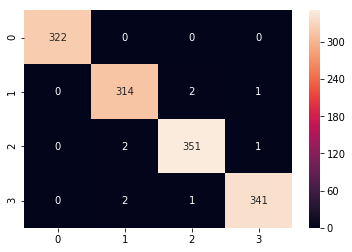

In [87]:
ac = accuracy_score(y_test_fe,clf_rf.predict(X_test_fe))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_fe,clf_rf.predict(X_test_fe))

sns.heatmap(cm, annot=True, fmt='d')

In [77]:

feature_splits = []

HOW_DEEP_TREES = 2
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)

features = X_fe.columns
target = 'category'
 
for x in range(0,20):
    sample_frame = kdd_prop.sample(frac=0.2, replace=True)
  
    estimator = clf.fit(sample_frame[features], sample_frame[target])
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold

    cur_node = ''
    for i in range(n_nodes):
        if (threshold[i] >= 0):
            cur_node = cur_node + features[feature[i]] + ' <= ' + str(threshold[i]) + " "
            #feature_splits[features[feature[i]]].append( threshold[i] )
    if (len(cur_node) > 0):
        feature_splits.append(cur_node)
 
feature_splits

['srv_count <= 59.5 src_bytes <= 8.5 srv_diff_host_rate <= 0.14000000059604645 ',
 'srv_count <= 56.5 src_bytes <= 18.5 srv_diff_host_rate <= 0.18000000715255737 ',
 'count <= 280.5 src_bytes <= 8.5 ',
 'count <= 265.0 src_bytes <= 8.5 ',
 'count <= 278.0 src_bytes <= 8.5 ',
 'src_bytes <= 8.5 dst_host_same_src_port_rate <= 0.014999999664723873 srv_count <= 195.0 ',
 'srv_count <= 58.0 src_bytes <= 8.5 srv_diff_host_rate <= 0.14000000059604645 ',
 'count <= 242.0 src_bytes <= 18.5 ',
 'srv_count <= 59.5 src_bytes <= 8.5 srv_diff_host_rate <= 0.14000000059604645 ',
 'srv_count <= 73.5 src_bytes <= 8.5 srv_diff_host_rate <= 0.14000000059604645 ',
 'srv_count <= 73.5 src_bytes <= 8.5 ',
 'count <= 258.5 src_bytes <= 8.5 ',
 'srv_count <= 59.5 src_bytes <= 8.5 srv_diff_host_rate <= 0.14000000059604645 ',
 'count <= 327.5 src_bytes <= 8.5 ',
 'count <= 273.5 src_bytes <= 8.5 ',
 'count <= 70.5 src_bytes <= 8.5 srv_count <= 51.0 ',
 'count <= 338.0 src_bytes <= 8.5 ',
 'srv_count <= 58.0 src

In [ ]:
## 1. Server count
## 2. Source bytes
## 3. Count

## Common characteristics 

In [102]:
#random.sample(kdd_prop.index, 10)
features = X_fe.columns
target = 'category'

Index(['logged_in', 'dst_host_srv_count', 'srv_count',
       'dst_host_same_src_port_rate', 'protocol_type', 'srv_diff_host_rate',
       'dst_host_count', 'count', 'is_guest_login', 'src_bytes', 'hot'],
      dtype='object')

In [ ]:
df.sample(frac=0.1, replace=True)

In [66]:

kdd_temp = kdd_prop.copy()

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
## Encoding Service
le.fit(kdd_temp.service)
kdd_prop['service']= le.transform(kdd_prop.service)

## Encoding Flag
le.fit(kdd_temp.flag)
kdd_prop['flag'] = le.transform(kdd_prop.flag)

le.fit(kdd_temp.protocol_type)
kdd_prop['protocol_type'] = le.transform(kdd_prop.protocol_type)


kdd_temp = kdd_temp[['logged_in',
                   'dst_host_srv_count',
                   'srv_count',
                   'dst_host_same_src_port_rate',
                   'protocol_type',
                   'srv_diff_host_rate',
                   'dst_host_count',
                   'count',
                   'is_guest_login',
                   'src_bytes',
                   'hot',
                   'category'
                 ]]

X_temp = kdd_temp[['logged_in',
                   'dst_host_srv_count',
                   'srv_count',
                   'dst_host_same_src_port_rate',
                   'protocol_type',
                   'srv_diff_host_rate',
                   'dst_host_count',
                   'count',
                   'is_guest_login',
                   'src_bytes',
                   'hot',
                 ]]

y_temp = kdd_temp['category']

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [84]:
HOW_DEEP_TREES = 1
clf = DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES, class_weight="balanced")
clf = clf.fit(X_temp, y_temp)
dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=X_temp.columns,  
    class_names=['other','Probing'], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_render',view=True)

'dtree_render.pdf'

In [80]:
feature_splits = []

HOW_DEEP_TREES = 2
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)

features = X_temp.columns
target = 'category'
 
for x in range(0,20):
    sample_frame = kdd_temp.sample(frac=0.1, replace=True)
  
    estimator = clf.fit(sample_frame[features], sample_frame[target])
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold

    cur_node = ''
    for i in range(n_nodes):
        if (threshold[i] >= 0):
            cur_node = cur_node + features[feature[i]] + ' <= ' + str(threshold[i]) + " "
            #feature_splits[features[feature[i]]].append( threshold[i] )
    if (len(cur_node) > 0):
        feature_splits.append(cur_node)
 
feature_splits

['count <= 300.5 src_bytes <= 19.0 ',
 'src_bytes <= 18.5 dst_host_same_src_port_rate <= 0.45499998331069946 srv_count <= 77.5 ',
 'srv_count <= 73.0 src_bytes <= 19.0 srv_diff_host_rate <= 0.18000000715255737 ',
 'src_bytes <= 8.5 srv_count <= 1.5 srv_count <= 62.0 ',
 'count <= 337.5 src_bytes <= 8.5 ',
 'count <= 357.0 src_bytes <= 8.5 ',
 'srv_count <= 59.0 src_bytes <= 18.5 ',
 'srv_count <= 74.0 src_bytes <= 8.5 ',
 'count <= 317.5 src_bytes <= 8.5 ',
 'srv_count <= 59.5 src_bytes <= 9.0 ',
 'srv_count <= 53.0 src_bytes <= 18.5 ',
 'src_bytes <= 8.5 logged_in <= 0.5 srv_count <= 44.5 ',
 'count <= 254.0 src_bytes <= 8.5 ',
 'srv_count <= 73.5 src_bytes <= 8.5 ',
 'srv_count <= 75.5 src_bytes <= 8.5 ',
 'count <= 279.5 src_bytes <= 8.5 ',
 'srv_count <= 73.5 src_bytes <= 19.0 ',
 'count <= 320.5 src_bytes <= 18.5 ',
 'count <= 338.5 src_bytes <= 8.5 ',
 'count <= 278.5 src_bytes <= 9.0 ']